### 라이브러리

In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### 데이터 불러오기

In [2]:
DATA_PATH = os.path.join(os.environ['DEV_PATH'], 'datasets/bike-sharing-demand')

train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'), parse_dates=['datetime'])
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), parse_dates=['datetime'])
sub = pd.read_csv(os.path.join(DATA_PATH, 'sampleSubmission.csv'))

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [3]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### 특성값들의 분포

#### 연속형 변수
* datetime, temp, atemp, humidity, windspeed, casual, registered

In [6]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
value_columns = [
    'datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered'
]

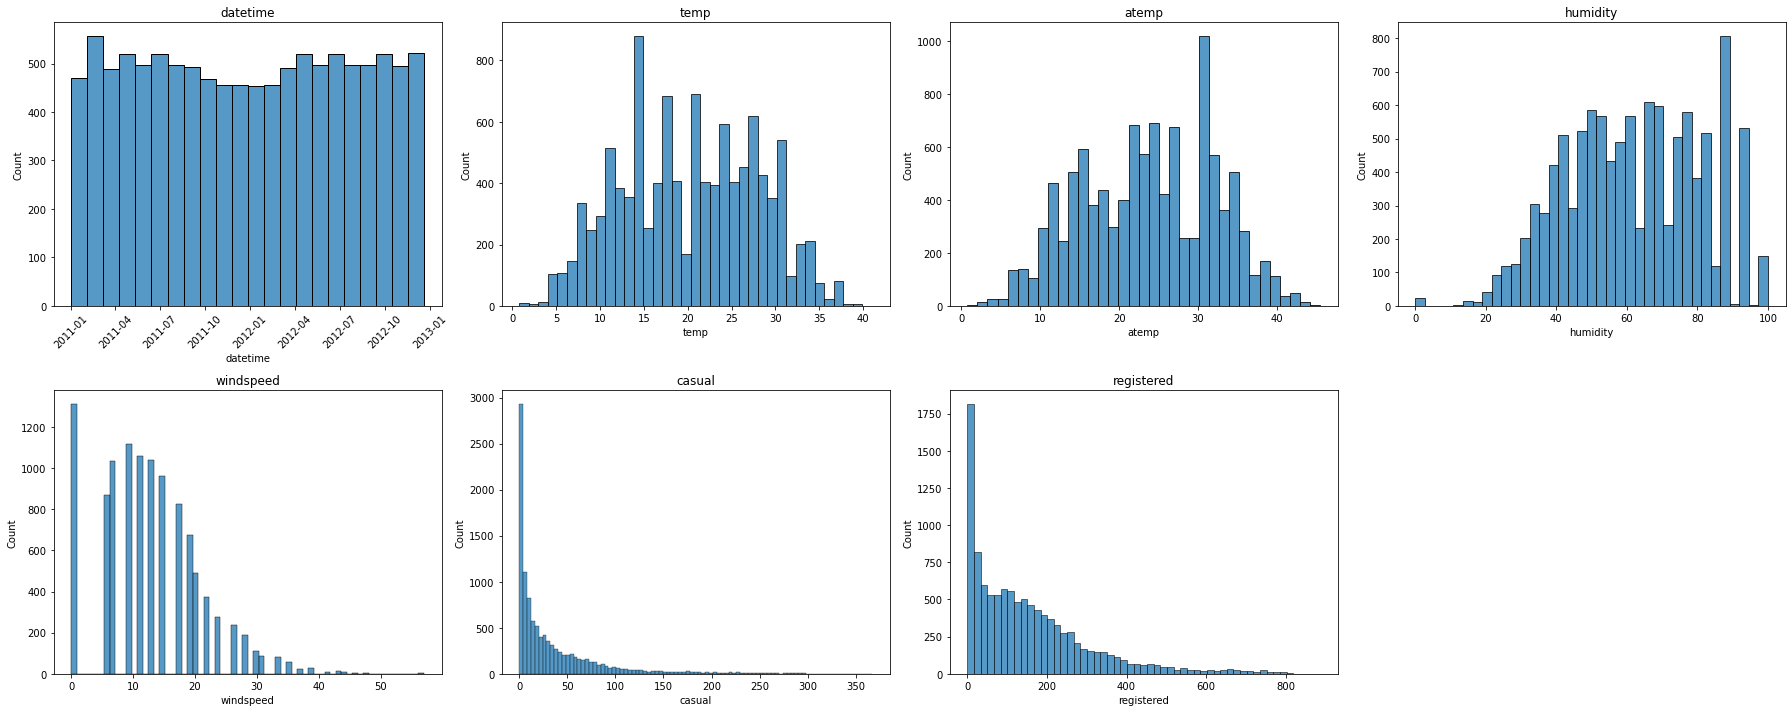

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(25, 10))
for ax, col in zip(axes.ravel(), value_columns):
    sns.histplot(train[col], ax=ax)
    ax.set_title(col)
axes = axes.ravel()
axes[0].tick_params(axis='x', labelrotation=45)
for i in range(len(value_columns), 8):
    axes[i].set_visible(False)
plt.tight_layout()

#### 범주형 변수
* season, holiday, workingday, weather
* season을 제외하고 불균형하게 분포

In [9]:
category_columns = [
    'season', 'holiday', 'workingday', 'weather'
]

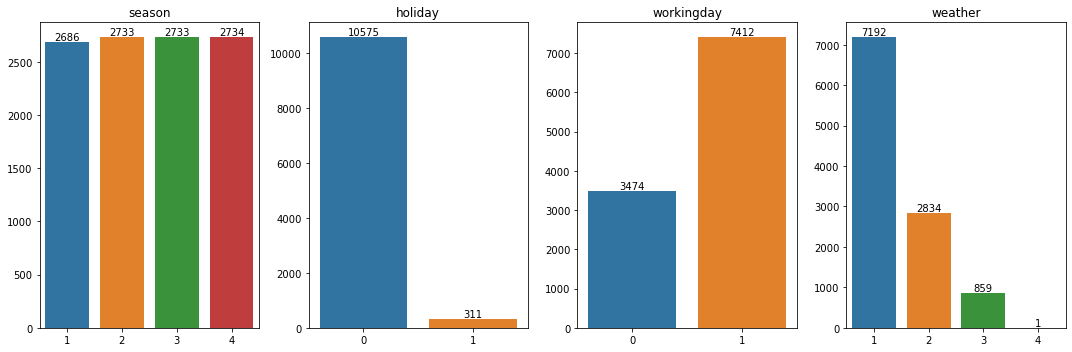

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for ax, col in zip(axes.ravel(), category_columns):
    counts = train[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_title(col)
    ax.bar_label(ax.containers[0], fmt='%d')

plt.tight_layout()
plt.show()

### datetime 특성
* train data
    * 2011-01-01 ~ 2012-12-19
* test data
    * 2011-01-20 ~ 2012-12-31

In [11]:
train.datetime.describe()

count                   10886
unique                  10886
top       2011-06-09 04:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

In [12]:
test.datetime.describe()

count                    6493
unique                   6493
top       2011-09-21 10:00:00
freq                        1
first     2011-01-20 00:00:00
last      2012-12-31 23:00:00
Name: datetime, dtype: object

* train 시간은: 2011-01-01 ~ 2012-12-19 
* test 시간은: 2011-01-20 ~ 2012-12-31

### count와 다른 특성간의 관계

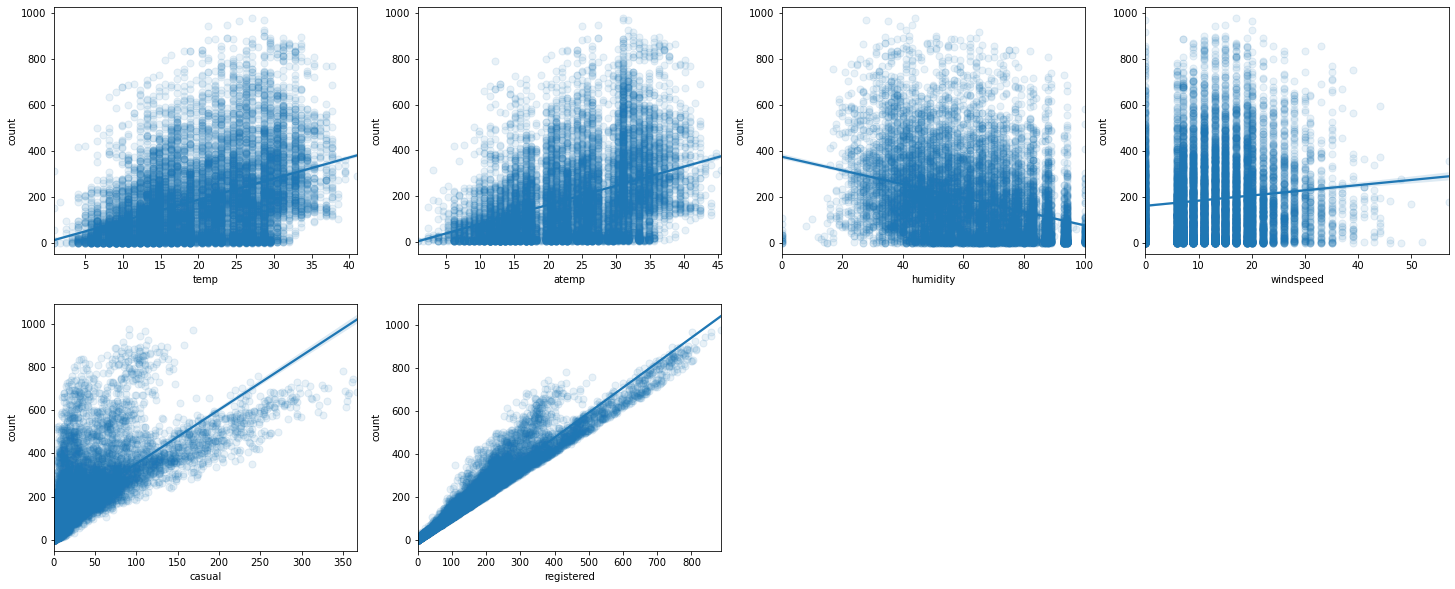

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(25, 10))
axes = axes.ravel()

for ax, col in zip(axes, value_columns[1:]):
    sns.regplot(x=col, y='count', data=train, ax=ax, scatter_kws={'s': 50, 'alpha': 0.1})
for i in range(len(value_columns) - 1, 8):
    axes[i].set_visible(False)

### 상관관계

In [14]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


* 상관계수: 0~1, -1~0

In [15]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [16]:
train.corr()['count'].abs().sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
humidity      0.317371
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

In [17]:
data = train.corr()['count'].abs().sort_values(ascending=False)
print(data.index)
print(data.values)

Index(['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'season',
       'weather', 'windspeed', 'workingday', 'holiday'],
      dtype='object')
[1.         0.97094811 0.69041357 0.39445364 0.38978444 0.31737148
 0.16343902 0.1286552  0.10136947 0.01159387 0.00539298]


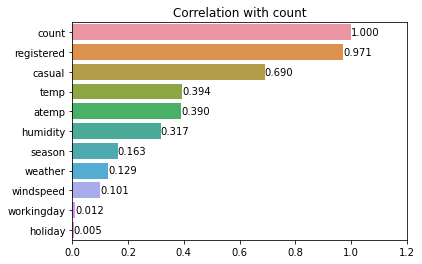

In [18]:
ax = sns.barplot(x=data.values, y=data.index)
ax.set_title('Correlation with count')
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticks(np.linspace(0, 1.2, 7))